### ✏️ Frame the Problem

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. 

The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The goal of this notebook is to accurately classify an input as either Iris Setosa, Iris Virginica, or Iris Versicolor. Specfically, I will be expermienting with a `Multinomial Regression Classifier` e.g `Softmax Regression`.

### ☀️ Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 💾 Load The Data

In [2]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Check for Null Values

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 📊 EDA

In [5]:
def print_feature_mean(feature):
    setosa = df[df['species'] == "Iris-setosa"][feature].mean()
    veriscolor = df[df['species'] == "Iris-veriscolor"][feature].mean()
    virginica = df[df['species'] == "Iris-virginica"][feature].mean()
    print("")
    print(f"Iris-Setosa ")

In [6]:
df.groupby('species').describe()

sepal_length                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                sepal_width         ... petal_length      petal_width         \
                      count   mean  ...          75%  max       count   mean   
species                             ...                                        
Iris-setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
Iris-versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
Iris-virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                                    
                      std  min  25%  50%  75%  max  
species                                             
Iris-setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

#### Examine Differences in `sepal_length`

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


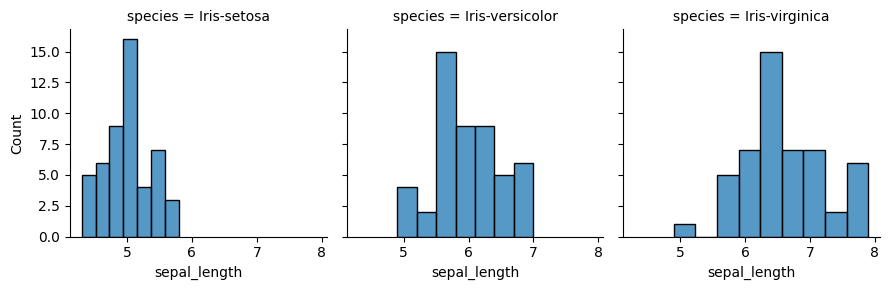

In [7]:
g = sns.FacetGrid(df, col="species")
g.map(sns.histplot, "sepal_length")

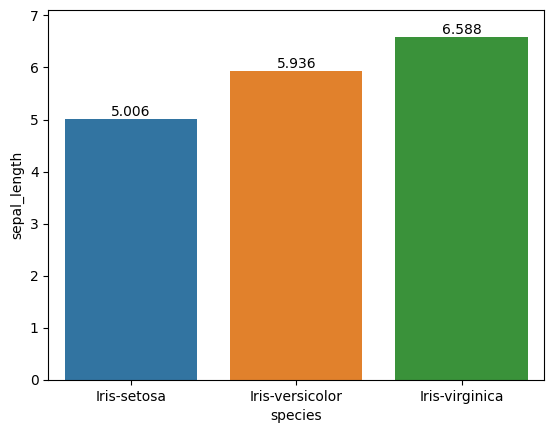

In [8]:
plot = sns.barplot(data=df, x="species", y="sepal_length", errwidth=0)

for i in plot.containers: plot.bar_label(i,)

#### Examine Differences in `sepal_width`

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


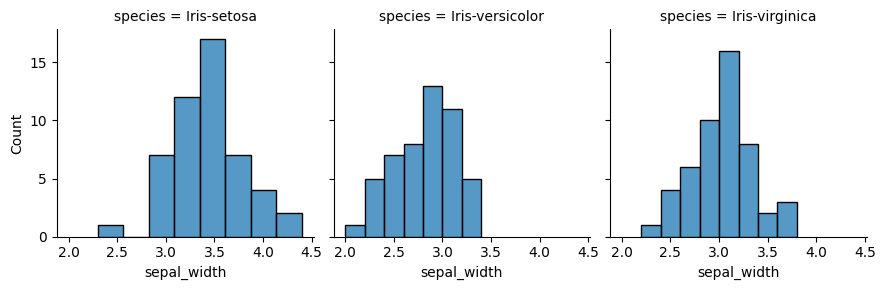

In [9]:
g = sns.FacetGrid(df, col="species")
g.map(sns.histplot, "sepal_width")

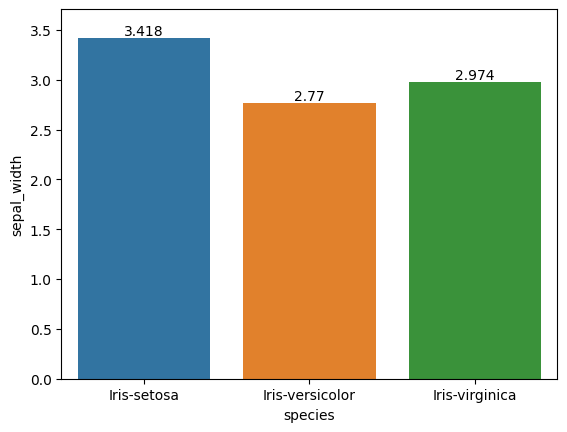

In [10]:
plot = sns.barplot(data=df, x="species", y="sepal_width", errwidth=0)

for i in plot.containers: plot.bar_label(i,)

#### Examine Differences in `petal_length`

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


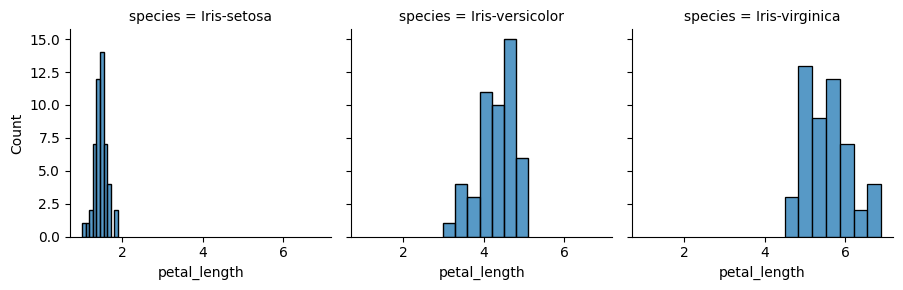

In [11]:
g = sns.FacetGrid(df, col="species")
g.map(sns.histplot, "petal_length")

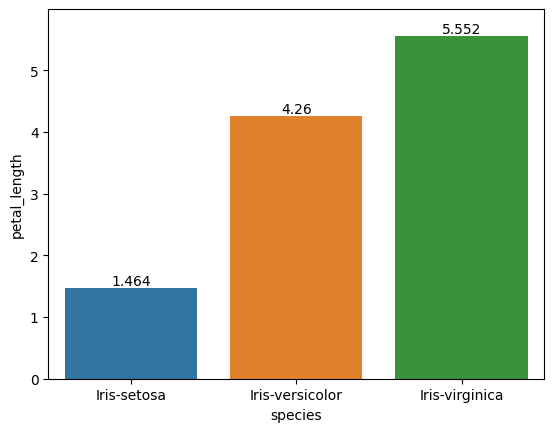

In [12]:
plot = sns.barplot(data=df, x="species", y="petal_length", errwidth=0)

for i in plot.containers: plot.bar_label(i,)

#### Examine Differences in `petal_width`

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


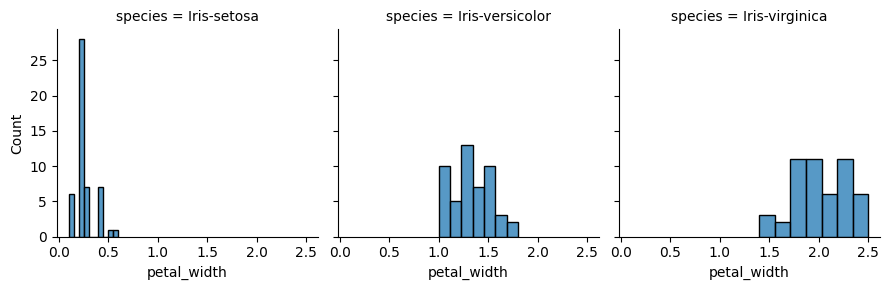

In [13]:
g = sns.FacetGrid(df, col="species")
g.map(sns.histplot, "petal_width")

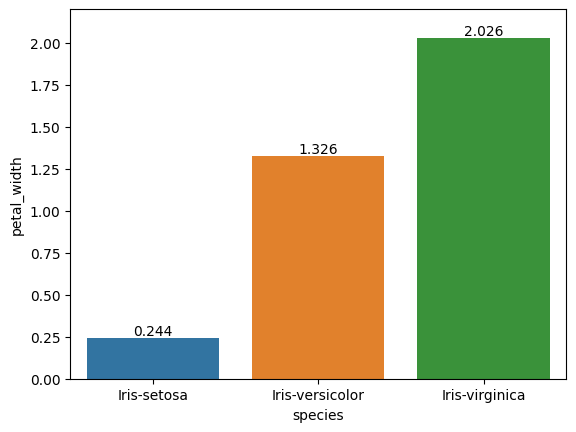

In [14]:
plot = sns.barplot(data=df, x="species", y="petal_width", errwidth=0)

for i in plot.containers: plot.bar_label(i,)

#### Feature Experimentation - `petal_circumferance`

In [15]:
import math

df['petal_circumferance'] = df['petal_length'] * 2 * math.pi

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


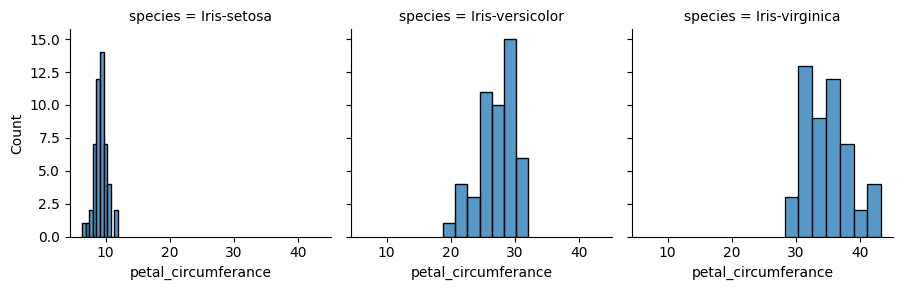

In [16]:
g = sns.FacetGrid(df, col="species")
g.map(sns.histplot, "petal_circumferance")

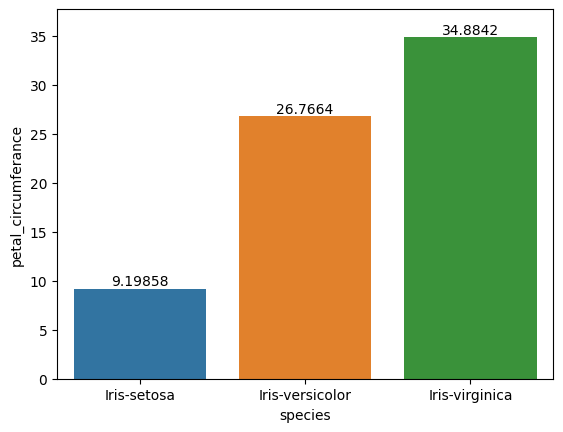

In [17]:
plot = sns.barplot(data=df, x="species", y="petal_circumferance", errwidth=0)

for i in plot.containers: plot.bar_label(i,)

Because `petal_circumferance` more or less yields is a duplicatus data point as `petal_length`, I'm dropping it from the dataset.

In [18]:
df = df.drop(columns="petal_circumferance", axis=1)

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 💻 Prepare Data

#### Encode categorical lables into integers

In [20]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['species'] = LE.fit_transform(df['species'])

#### Create Training & Test Data

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='species')
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 💻 Select & Train Models

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

def print_accuracy_reports(predictions, labels):
    print("Confusion Matrix:")
    print("")
    print(confusion_matrix(predictions, labels))
    print("")
    print("Classification Report:")
    print("")
    print(classification_report(predictions, labels))

In [23]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)

log_reg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [24]:
predictions = log_reg.predict(X_test)

print_accuracy_reports(predictions, y_test)

Confusion Matrix:

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

